# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests
import openweathermapy.core as owm


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

array([ 88.04707208, -23.98320987, -29.78119597, ...,  57.03218484,
        21.90863146,  76.09277455])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
date = []
city_name = []
country = []
lat = []
long = []
clouds = []
humidity = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Get Data")


#Loop through the cities in the city list 
for city in cities:  
    
   
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        date.append(response["dt"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        clouds.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # increment counter 
        record= record + 1
        
        # Wait
        time.sleep(1.01)
        
    
    except:
        print("City not found.")
    continue
    
    

Get Data
City not found.
City not found.
City not found.
Record 1 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=thompson
Record 2 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=kapaa
Record 3 | Japura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=japura
Record 4 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=ucluelet
Record 5 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=saint-philippe
Record 6 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=hilo
Record 7 | Villa Carlos Paz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=villa carlos paz
Record 8 

Record 62 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=avera
Record 63 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=qaanaaq
Record 64 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=khatanga
Record 65 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=busselton
Record 66 | Buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=buraydah
Record 67 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=klaksvik
Record 68 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=yellowknife
Record 69 | Ribeira Grande
http://api.openweathermap.org/data/2.5/wea

City not found.
Record 123 | Charters Towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=charters towers
Record 124 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=grindavik
Record 125 | Miandrivazo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=miandrivazo
City not found.
Record 126 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=severo-kurilsk
Record 127 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=faanui
City not found.
City not found.
Record 128 | Cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=cairns
Record 129 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4

City not found.
Record 183 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=hasaki
Record 184 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=namibe
Record 185 | Newport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=newport
Record 186 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=port elizabeth
Record 187 | Iskateley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=iskateley
Record 188 | Gulabpura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=gulabpura
Record 189 | Emerald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=emerald
Record 190 | Camabatela
http://api.openwea

Record 244 | Zinder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=zinder
Record 245 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=nouadhibou
Record 246 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=grand gaube
Record 247 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=fortuna
Record 248 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=dingle
Record 249 | Nizwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=nizwa
Record 250 | Mayna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=mayna
Record 251 | Sanbu
http://api.openweathermap.org/data/2.5/weather?units=Im

City not found.
Record 305 | Mishkino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=mishkino
Record 306 | Conceicao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=conceicao da barra
Record 307 | Kunda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=kunda
Record 308 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=comodoro rivadavia
Record 309 | Beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=beira
Record 310 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=santa maria
Record 311 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=aklavik
Record 312 | D

Record 365 | Asosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=asosa
Record 366 | Yerofey Pavlovich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=yerofey pavlovich
Record 367 | Razole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=razole
Record 368 | Tonantins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=tonantins
Record 369 | Isiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=isiro
Record 370 | Ha Giang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=ha giang
Record 371 | Alice Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=alice springs
Record 372 | Yulara
http://api.openweathermap.or

Record 426 | Sompeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=sompeta
Record 427 | Stokmarknes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=stokmarknes
Record 428 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=tautira
Record 429 | Kumano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=kumano
City not found.
Record 430 | Raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=raudeberg
Record 431 | Ballybofey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=ballybofey
Record 432 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=vardo
Record 433 | Gubkinskiy
http://api.openweatherma

Record 487 | Falam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=falam
Record 488 | Pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=pochutla
City not found.
City not found.
Record 489 | Dabwali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=dabwali
City not found.
Record 490 | Sarangani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=sarangani
City not found.
Record 491 | Nikolayevsk-na-amure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=nikolayevsk-na-amure
Record 492 | Zhangjiakou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=zhangjiakou
Record 493 | Karasjok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7

City not found.
Record 547 | Sibu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=sibu
Record 548 | Palauig
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=palauig
Record 549 | Kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=kangaatsiaq
Record 550 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=hofn
City not found.
Record 551 | Saeby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=saeby
Record 552 | Vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=vestmanna
Record 553 | Onguday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1fdff21e3f1669c4c7efdedfeb8797b0&q=onguday
Record 554 | Olinda
http://api.openweathermap.or

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:


dictCol = {
    "Date":date, 
    "City": city_name,
    "Country":country,
    "Clouds":clouds, 
    "Humidity": humidity,
    "Lat":lat, 
    "Long":long, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}



In [10]:
import csv 
weather= pd.DataFrame.from_dict(dictCol)

weather.to_csv('weather.csv')
# weather
weather

,Date,City,Country,Clouds,Humidity,Lat,Long,Max Temp,Wind Speed
0,1560992225,Thompson,CA,75,19,55.74,-97.86,80.60,8.05
1,1560992169,Kapaa,US,40,66,22.08,-159.32,86.00,10.29
2,1560992323,Japura,ID,29,97,-0.42,102.29,74.15,2.62
3,1560992244,Ucluelet,CA,75,71,48.94,-125.55,59.00,23.04
4,1560992178,Saint-Philippe,CA,40,78,45.36,-73.48,77.00,4.70
5,1560992125,Hilo,US,75,61,19.71,-155.08,82.40,11.41
6,1560992204,Villa Carlos Paz,AR,0,61,-31.42,-64.50,55.00,11.41
7,1560992328,Pimentel,BR,0,97,-3.70,-45.50,72.89,1.41
8,1560992330,Gizo,IL,40,83,31.80,34.94,73.40,5.82
9,1560992331,Bukid,PH,1,75,11.29,124.75,82.25,5.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

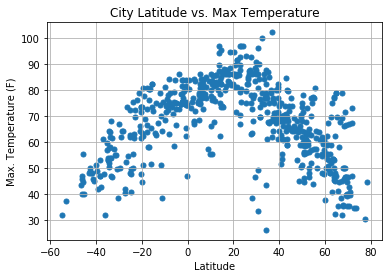

In [21]:
# scatterplot
plt.scatter(weather["Lat"], weather["Max Temp"], marker="o", s=25)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("LTplot.png")
plt.show()

#### Latitude vs. Humidity Plot

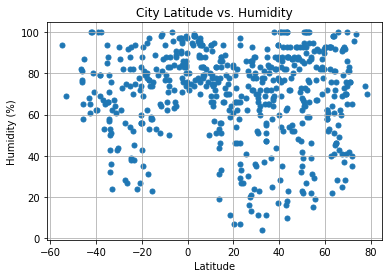

In [20]:
plt.scatter(weather["Lat"], weather["Humidity"], marker="o", s=25)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("LHplot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

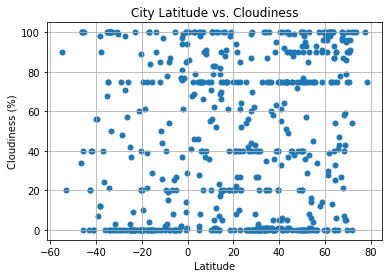

In [19]:
plt.scatter(weather["Lat"], weather["Clouds"], marker="o", s=25)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("LCPlot.png")
plt.show()


#### Latitude vs. Wind Speed Plot

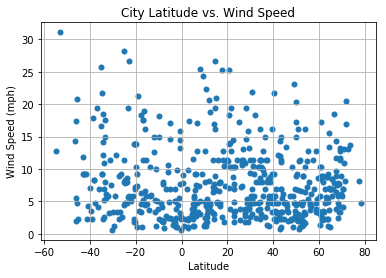

In [18]:
plt.scatter(weather["Lat"], weather["Wind Speed"], marker="o", s=25)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("LWplot.png")
plt.show()